In [ ]:
# Importing the packages
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score, roc_auc_score, roc_curve, classification_report
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.simplefilter(action = "ignore")
sns.set()
plt.style.use('ggplot')
%matplotlib inline

In [ ]:
# Reading the dataset
df = pd.read_csv('diabetes.csv')

In [ ]:
# Printing the first 5 rows of the dataframe.
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
#Feature information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
# Descriptive statistics of the data set
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
# Print the size of the data set. It consists of 768 observation units and 9 variables.
print("Dataset shape:", df.shape)

Dataset shape: (768, 9)


In [ ]:
# Print the distribution of the Outcome variable.
df["Outcome"].value_counts()*100/len(df)

0    65.104167
1    34.895833
Name: Outcome, dtype: float64

In [ ]:
# Print the classes of the outcome variable.
df.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [ ]:
# import pandas as pd
# from sklearn.utils import resample

# # Separate majority and minority classes
# df_majority = df[df['Outcome'] == 0]
# df_minority = df[df['Outcome'] == 1]

# # Upsample the minority class
# df_minority_upsampled = resample(df_minority, replace=True, n_samples=384, random_state=2)

# # Downsample the majority class
# df_majority_downsampled = resample(df_majority, replace=False, n_samples=384, random_state=2)

# # Combine upsampled minority class with downsampled majority class
# df_balanced = pd.concat([df_majority_downsampled, df_minority_upsampled])

# # Check the class distribution
# print(df_balanced['Outcome'].value_counts())
import pandas as pd
from sklearn.utils import resample

# Separate majority and minority classes
df_majority = df[df['Outcome'] == 0]
df_minority = df[df['Outcome'] == 1]

# Upsample the minority class
df_minority_upsampled = resample(df_minority, replace=True, n_samples=len(df_majority), random_state=2)

# Combine majority class with upsampled minority class
df_balanced = pd.concat([df_majority, df_minority_upsampled])

# Check the class distribution
print(df_balanced['Outcome'].value_counts())



0    500
1    500
Name: Outcome, dtype: int64


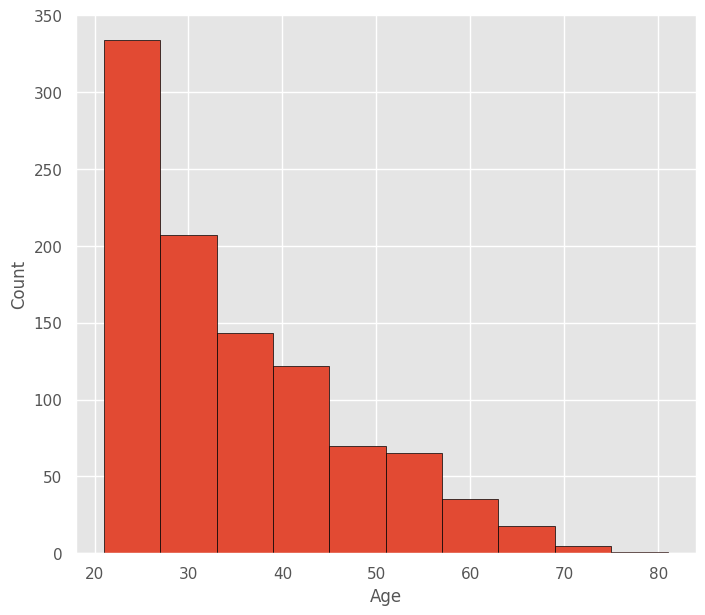

In [ ]:
# Plot the histogram of the Age variable
plt.figure(figsize=(8,7))
plt.xlabel('Age', fontsize=12)
plt.ylabel('Count', fontsize=12)
df_balanced["Age"].hist(edgecolor = "black");

In [ ]:
print("Max Age: " + str(df_balanced["Age"].max()) +','+ " Min Age: " + str(df_balanced["Age"].min()))

Max Age: 81, Min Age: 21


<Axes: xlabel='BMI', ylabel='Density'>

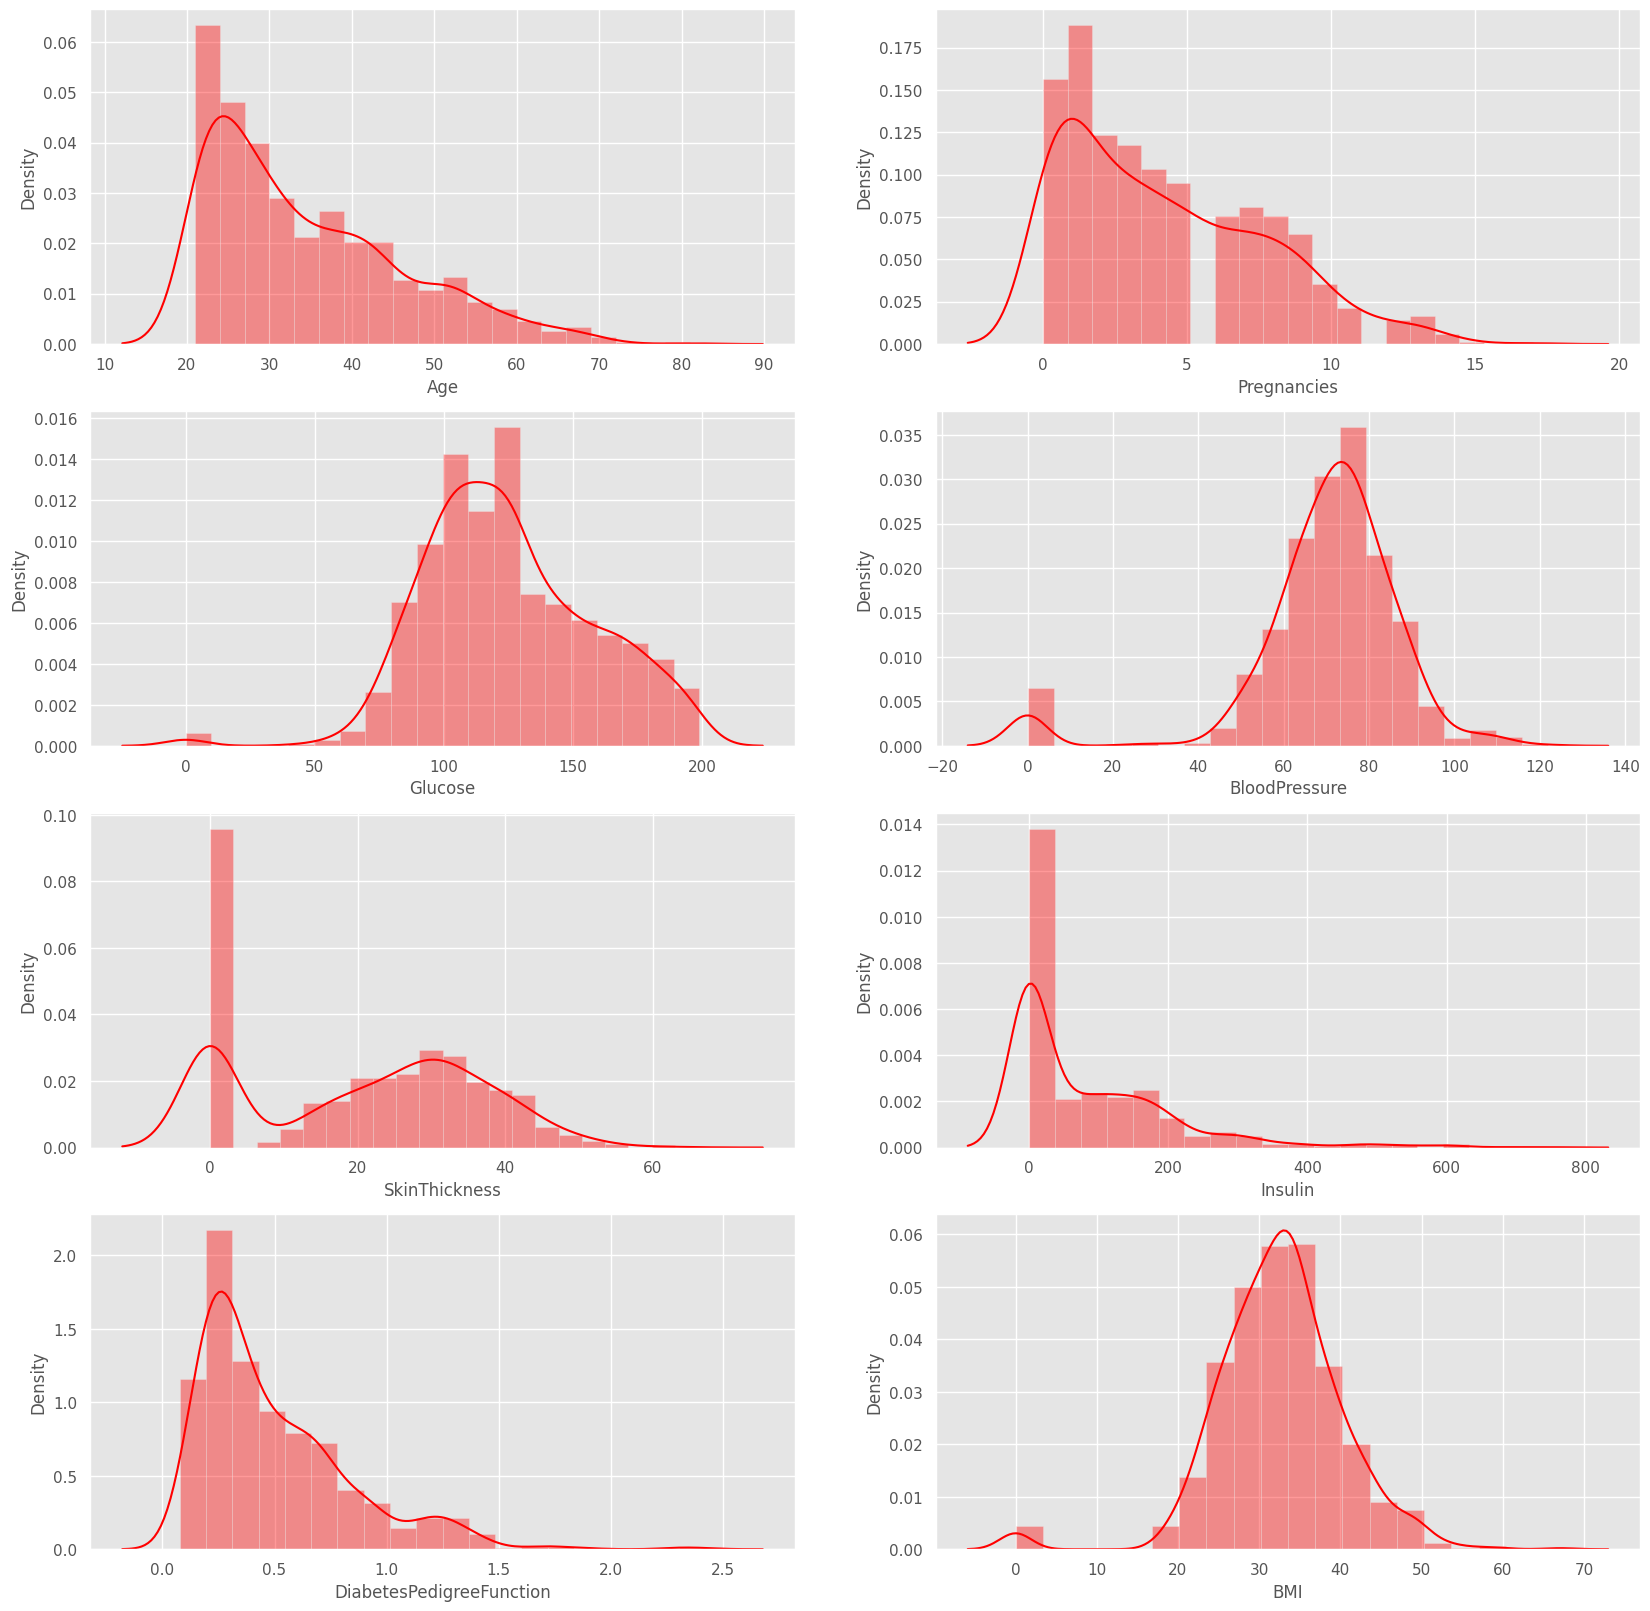

In [ ]:
# Plot histogram and density graphs of all variables
fig, ax = plt.subplots(4,2, figsize=(20,20))
sns.distplot(df_balanced.Age, bins = 20, ax=ax[0,0], color="red")
sns.distplot(df_balanced.Pregnancies, bins = 20, ax=ax[0,1], color="red")
sns.distplot(df_balanced.Glucose, bins = 20, ax=ax[1,0], color="red")
sns.distplot(df_balanced.BloodPressure, bins = 20, ax=ax[1,1], color="red")
sns.distplot(df_balanced.SkinThickness, bins = 20, ax=ax[2,0], color="red")
sns.distplot(df_balanced.Insulin, bins = 20, ax=ax[2,1], color="red")
sns.distplot(df_balanced.DiabetesPedigreeFunction, bins = 20, ax=ax[3,0], color="red")
sns.distplot(df_balanced.BMI, bins = 20, ax=ax[3,1], color="red")

In [ ]:
df_balanced.groupby("Outcome").agg({"Pregnancies":"mean"})

,Pregnancies
Outcome,
0,3.298
1,5.156


In [ ]:
df_balanced.groupby("Outcome").agg({"Age":"mean"})

,Age
Outcome,
0,31.190
1,37.548


In [ ]:
df_balanced.groupby("Outcome").agg({"Age":"max"})

,Age
Outcome,
0,81
1,70


In [ ]:
df_balanced.groupby("Outcome").agg({"Insulin": "mean"})

,Insulin
Outcome,
0,68.792
1,98.286


In [ ]:
df_balanced.groupby("Outcome").agg({"Insulin": "max"})

,Insulin
Outcome,
0,744
1,600


In [ ]:
df_balanced.groupby("Outcome").agg({"Glucose": "mean"})

,Glucose
Outcome,
0,109.980
1,140.236


In [ ]:
df_balanced.groupby("Outcome").agg({"Glucose": "max"})

,Glucose
Outcome,
0,197
1,199


In [ ]:
df_balanced.groupby("Outcome").agg({"BMI": "mean"})

,BMI
Outcome,
0,30.3042
1,34.7404


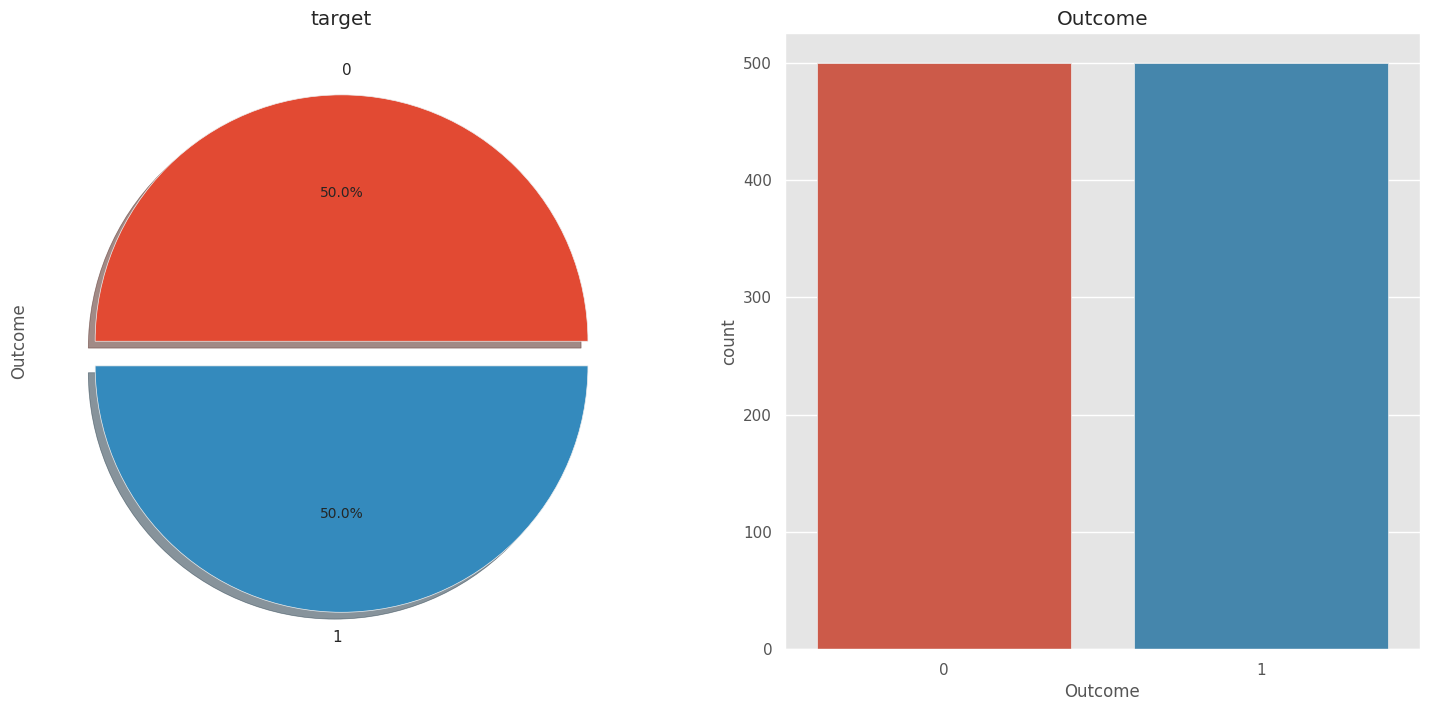

In [ ]:
# Visualize the distribution of the outcome variable in the data -> 0 - Healthy, 1 - Diabetic
f,ax=plt.subplots(1,2,figsize=(18,8))
df_balanced['Outcome'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('target')
ax[0].set_ylabel('Outcome')
sns.countplot(x='Outcome',data=df_balanced,ax=ax[1])
ax[1].set_title('Outcome')
plt.show()

In [ ]:
# corr() is used to find the pairwise correlation of all columns in the dataframe
df_balanced.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.113784,0.128335,-0.098212,-0.042610,-0.010956,0.003500,0.534402,0.267650
Glucose,0.113784,1.000000,0.157328,0.045499,0.289702,0.230949,0.105525,0.244706,0.463633
BloodPressure,0.128335,0.157328,1.000000,0.161829,0.083266,0.259956,0.049220,0.270701,0.095172
SkinThickness,-0.098212,0.045499,0.161829,1.000000,0.467356,0.371760,0.204659,-0.134131,0.055947
Insulin,-0.042610,0.289702,0.083266,0.467356,1.000000,0.173008,0.155409,-0.023994,0.126171
BMI,-0.010956,0.230949,0.259956,0.371760,0.173008,1.000000,0.118458,0.002472,0.283656
DiabetesPedigreeFunction,0.003500,0.105525,0.049220,0.204659,0.155409,0.118458,1.000000,0.051782,0.200801
Age,0.534402,0.244706,0.270701,-0.134131,-0.023994,0.002472,0.051782,1.000000,0.270971
Outcome,0.267650,0.463633,0.095172,0.055947,0.126171,0.283656,0.200801,0.270971,1.000000


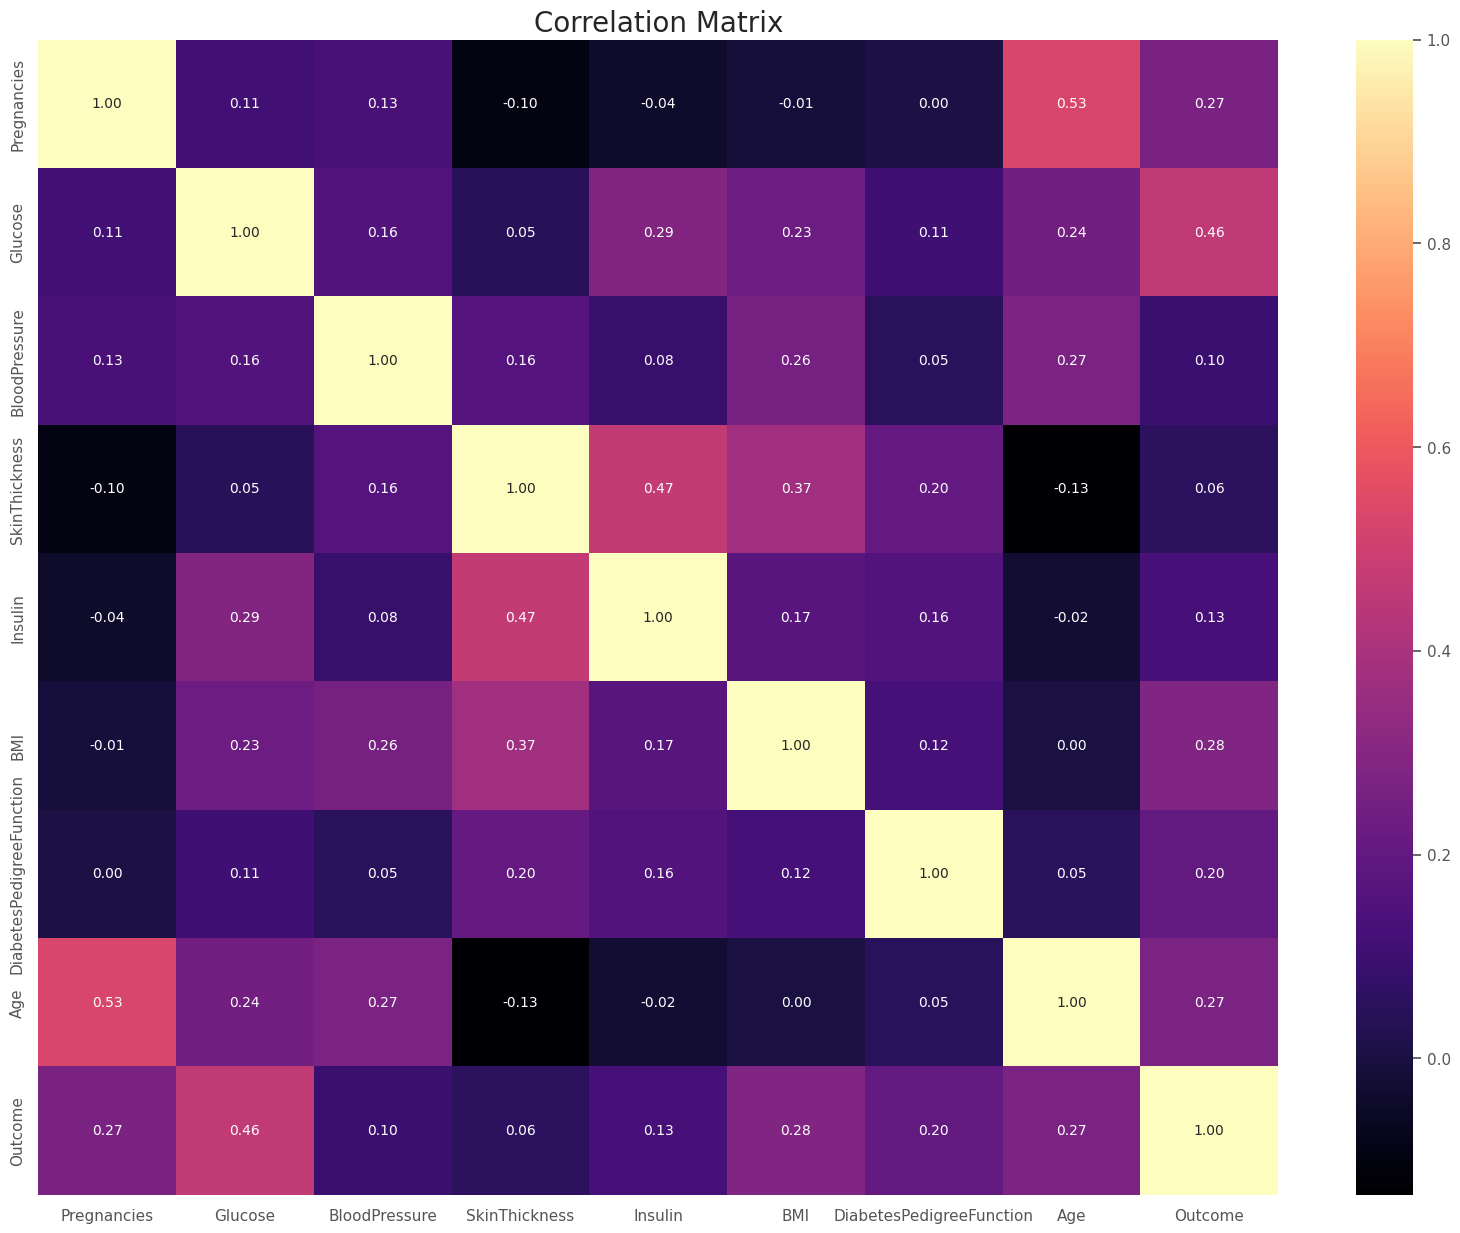

In [ ]:
# Correlation matrix of the data set
f, ax = plt.subplots(figsize= [20,15])
sns.heatmap(df_balanced.corr(), annot=True, fmt=".2f", ax=ax, cmap ='magma' )
ax.set_title("Correlation Matrix", fontsize=20)
#plt.savefig("corr.png", dpi=400)
plt.show()

In [ ]:
df_balanced[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df_balanced[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
# Now, we can look at where are missing values
df_balanced.isnull().sum()

Pregnancies                   0
Glucose                       6
BloodPressure                40
SkinThickness               302
Insulin                     497
BMI                          15
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

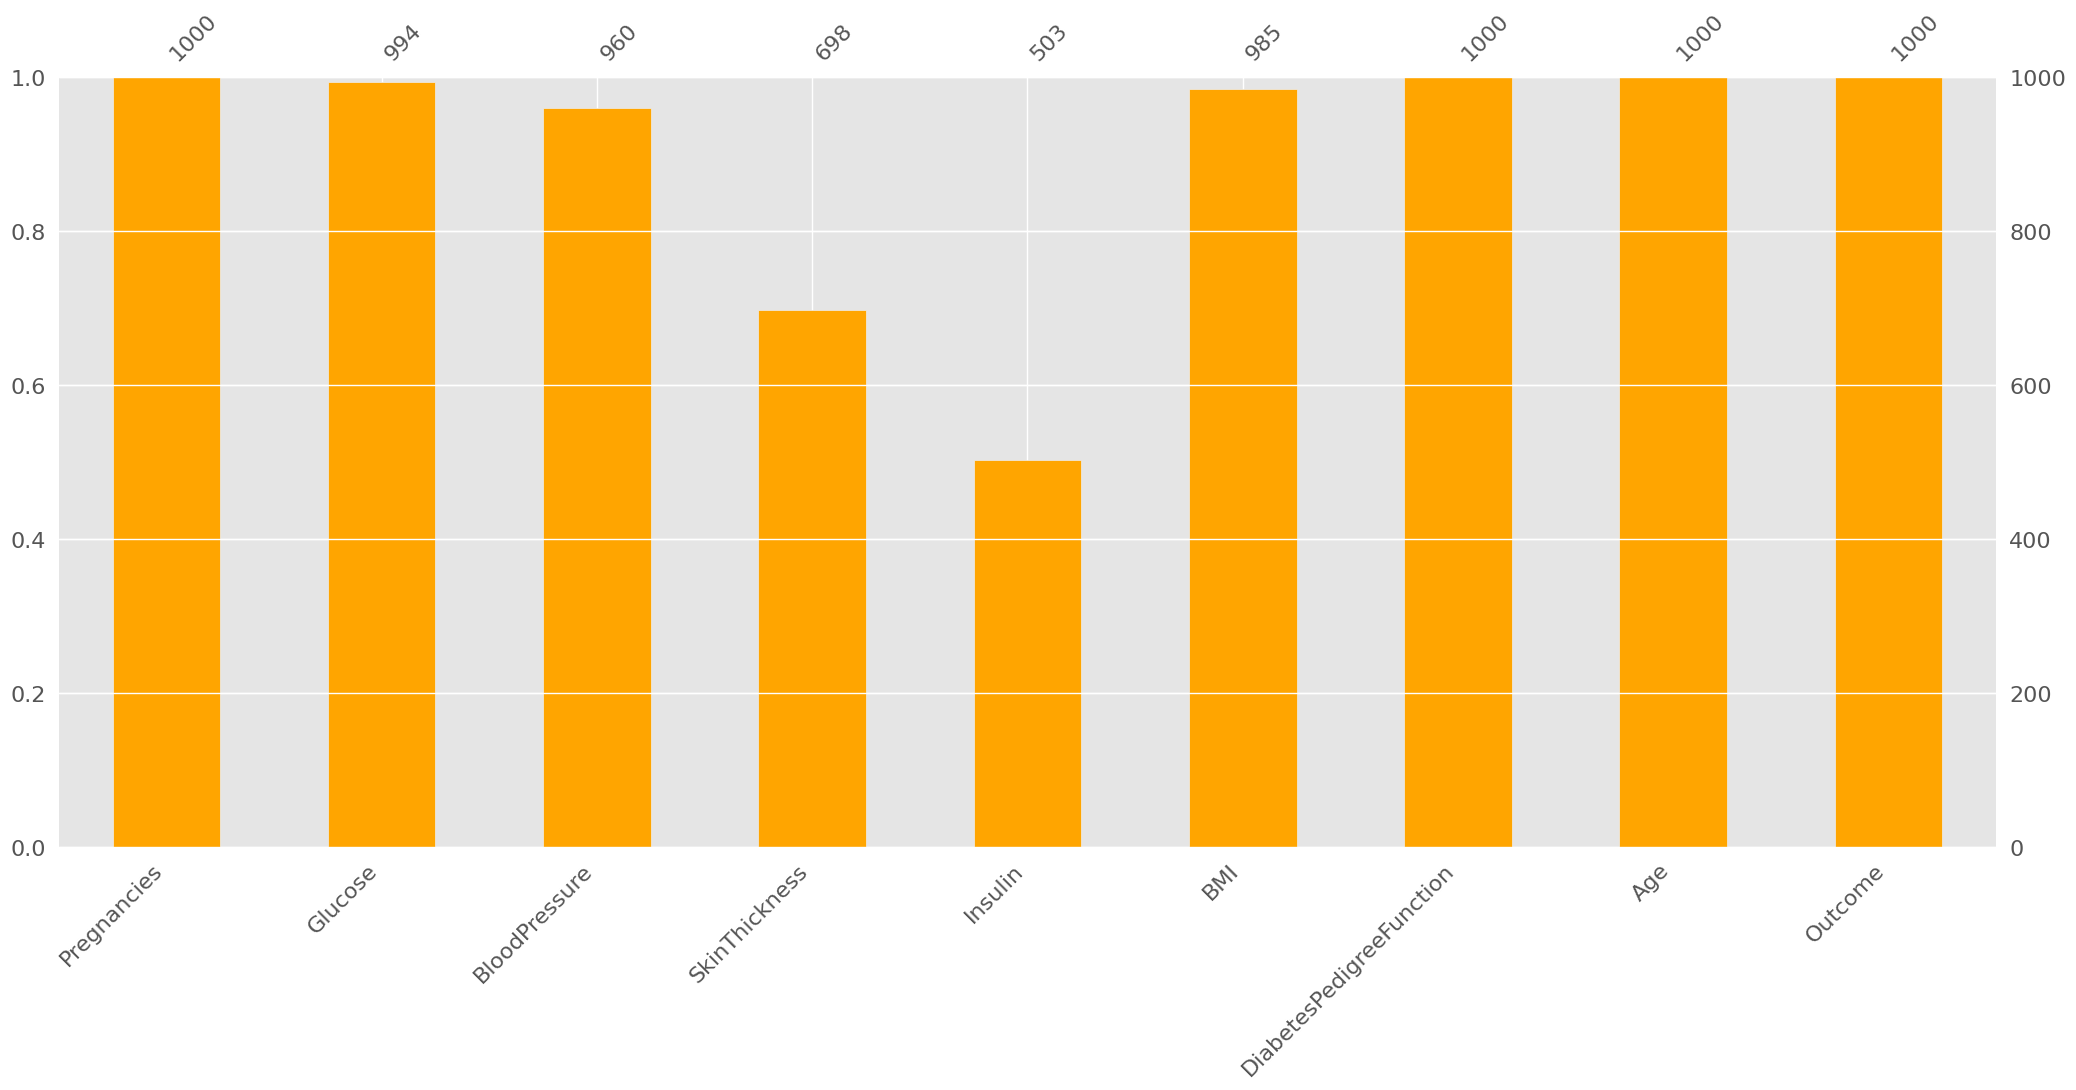

In [ ]:
# Visualizing the missing observations using the missingno library
import missingno as msno
msno.bar(df_balanced, color="orange");

In [ ]:
# The missing values will be filled with the median values of each variable
def median_target(var):
    temp = df_balanced[df_balanced[var].notnull()]
    temp = temp[[var, 'Outcome']].groupby(['Outcome'])[[var]].median().reset_index()
    return temp

In [ ]:
# The values to be given for incomplete observations are given the median value of people who are not sick and the median values of people who are sick.
columns = df_balanced.columns
columns = columns.drop("Outcome")
for i in columns:
    median_target(i)
    df_balanced.loc[(df_balanced['Outcome'] == 0 ) & (df_balanced[i].isnull()), i] = median_target(i)[i][0]
    df_balanced.loc[(df_balanced['Outcome'] == 1 ) & (df_balanced[i].isnull()), i] = median_target(i)[i][1]

In [ ]:
df_balanced.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,1,85.0,66.0,29.0,102.5,26.6,0.351,31,0
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
5,5,116.0,74.0,27.0,102.5,25.6,0.201,30,0
7,10,115.0,70.0,27.0,102.5,35.3,0.134,29,0
10,4,110.0,92.0,27.0,102.5,37.6,0.191,30,0


In [ ]:
# Number of missing values
df_balanced.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

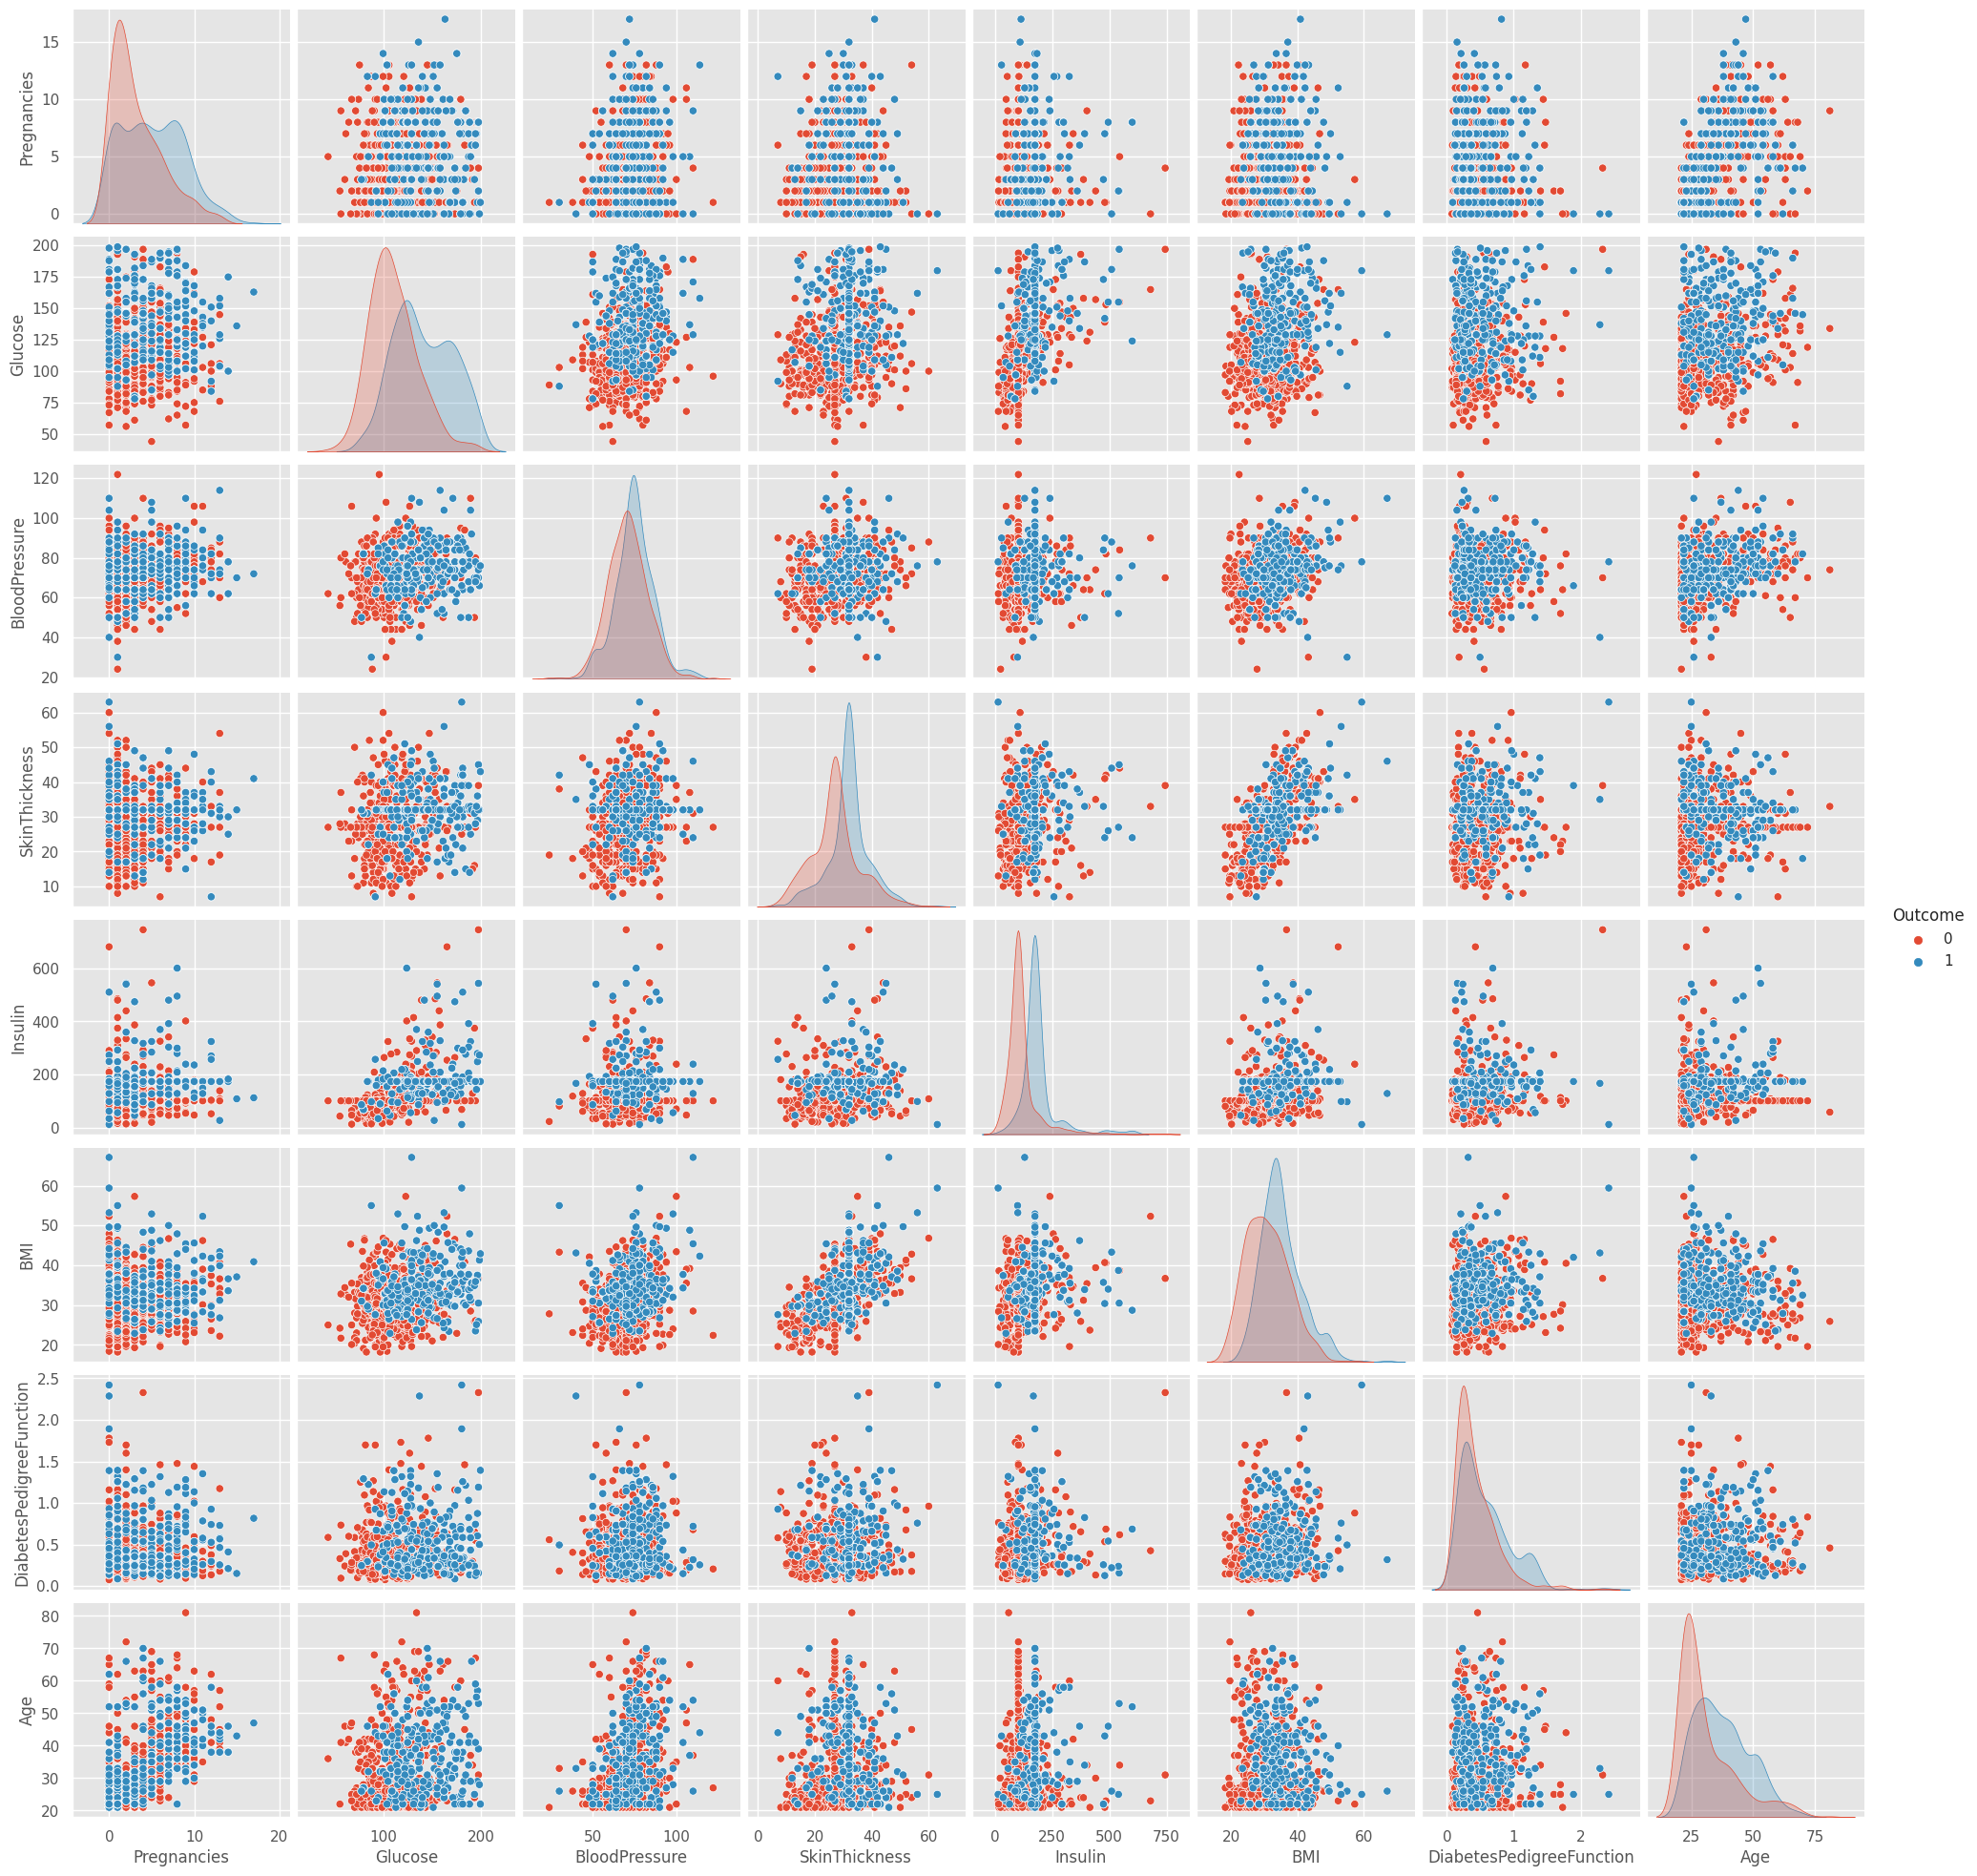

In [ ]:
p=sns.pairplot(df_balanced, hue = 'Outcome')

In [ ]:
for feature in df_balanced:

    Q1 = df_balanced[feature].quantile(0.25)
    Q3 = df_balanced[feature].quantile(0.75)
    IQR = Q3-Q1
    lower = Q1- 1.5*IQR
    upper = Q3 + 1.5*IQR

    if df_balanced[(df_balanced[feature] > upper)].any(axis=None):
        print(feature,"yes")
    else:
        print(feature, "no")

Pregnancies yes
Glucose no
BloodPressure yes
SkinThickness yes
Insulin yes
BMI yes
DiabetesPedigreeFunction yes
Age yes
Outcome no


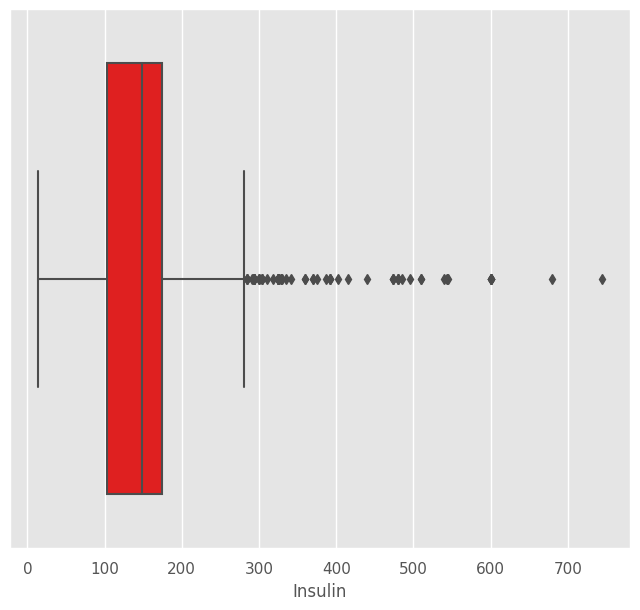

In [ ]:
# Outlier observation of Insulin
import seaborn as sns
plt.figure(figsize=(8,7))
sns.boxplot(x = df_balanced["Insulin"], color="red");

In [ ]:
# Conducting a stand alone observation review for the Insulin variable
# Suppressing contradictory values
Q1 = df_balanced.Insulin.quantile(0.25)
Q3 = df_balanced.Insulin.quantile(0.75)
IQR = Q3-Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
df_balanced.loc[df_balanced["Insulin"] > upper,"Insulin"] = upper

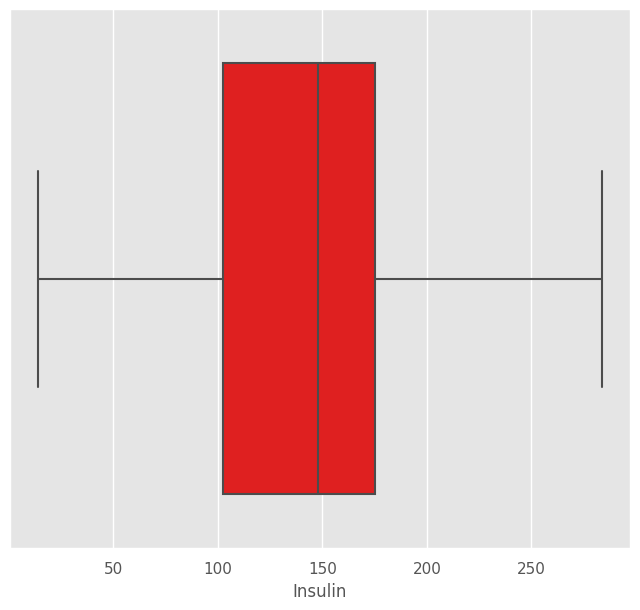

In [ ]:
import seaborn as sns
plt.figure(figsize=(8,7))
sns.boxplot(x = df_balanced["Insulin"], color="red");

In [ ]:
# Determining the outliers between all variables with the LOF method
from sklearn.neighbors import LocalOutlierFactor
lof =LocalOutlierFactor(n_neighbors= 10)
lof.fit_predict(df_balanced)

array([ 1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,
        1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1, -1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,
        1,  1, -1,  1,  1

In [ ]:
df_balanced_scores = lof.negative_outlier_factor_
np.sort(df_balanced_scores)[0:30]

array([-2.26357925, -2.22904654, -2.09985321, -2.07647977, -2.01899766,
       -1.95552124, -1.95536154, -1.95154833, -1.78001141, -1.76656368,
       -1.7606495 , -1.758435  , -1.75823774, -1.73507048, -1.73390299,
       -1.73390299, -1.7230522 , -1.7230522 , -1.71784447, -1.71674689,
       -1.713196  , -1.70697775, -1.69019606, -1.67348922, -1.66752918,
       -1.64992058, -1.64228458, -1.61145992, -1.60195824, -1.5988774 ])

In [ ]:
# Choosing the threshold value according to lof scores
threshold = np.sort(df_balanced_scores)[7]
threshold

-1.9515483327875223

In [ ]:
# Deleting those that are higher than the threshold
outlier = df_balanced_scores > threshold
df_balanced = df_balanced[outlier]

In [ ]:
# Examining the size of the data.
df_balanced.shape

(992, 9)

In [ ]:
X = df_balanced.drop(columns = 'Outcome', axis=1)
Y = df_balanced['Outcome']

In [ ]:
print(X)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
1              1     85.0           66.0           29.0    102.5  26.6   
3              1     89.0           66.0           23.0     94.0  28.1   
5              5    116.0           74.0           27.0    102.5  25.6   
7             10    115.0           70.0           27.0    102.5  35.3   
10             4    110.0           92.0           27.0    102.5  37.6   
..           ...      ...            ...            ...      ...   ...   
603            7    150.0           78.0           29.0    126.0  35.2   
130            4    173.0           70.0           14.0    168.0  29.7   
19             1    115.0           70.0           30.0     96.0  34.6   
115            4    146.0           92.0           32.0    175.0  31.2   
6              3     78.0           50.0           32.0     88.0  31.0   

     DiabetesPedigreeFunction  Age  
1                       0.351   31  
3                       0.167   21  


In [ ]:
print(Y)

1      0
3      0
5      0
7      0
10     0
      ..
603    1
130    1
19     1
115    1
6      1
Name: Outcome, Length: 992, dtype: int64


In [ ]:
scaler = StandardScaler()

In [ ]:
scaler.fit(X)

StandardScaler()

In [ ]:
standardized_data = scaler.transform(X)

In [ ]:
print(standardized_data)

[[-0.93381007 -1.31590208 -0.58856998 ... -0.96694755 -0.43321865
  -0.28838588]
 [-0.93381007 -1.18740133 -0.58856998 ... -0.73799682 -0.98049272
  -1.14619334]
 [ 0.22014769 -0.32002127  0.10444061 ... -1.11958136 -0.87936599
  -0.37416662]
 ...
 [-0.93381007 -0.35214646 -0.24206469 ...  0.254123    0.09620951
  -0.20260513]
 [-0.06834175  0.64373435  1.66371444 ... -0.26483198  0.12595267
   2.28503652]
 [-0.35683119 -1.54077839 -1.97459116 ... -0.29535875 -0.73957316
  -0.71728961]]


In [ ]:
X = standardized_data
Y = df_balanced['Outcome']

In [ ]:
print(X)
print(Y)

[[-0.93381007 -1.31590208 -0.58856998 ... -0.96694755 -0.43321865
  -0.28838588]
 [-0.93381007 -1.18740133 -0.58856998 ... -0.73799682 -0.98049272
  -1.14619334]
 [ 0.22014769 -0.32002127  0.10444061 ... -1.11958136 -0.87936599
  -0.37416662]
 ...
 [-0.93381007 -0.35214646 -0.24206469 ...  0.254123    0.09620951
  -0.20260513]
 [-0.06834175  0.64373435  1.66371444 ... -0.26483198  0.12595267
   2.28503652]
 [-0.35683119 -1.54077839 -1.97459116 ... -0.29535875 -0.73957316
  -0.71728961]]
1      0
3      0
5      0
7      0
10     0
      ..
603    1
130    1
19     1
115    1
6      1
Name: Outcome, Length: 992, dtype: int64


In [ ]:
# splitting data into training and test set

from sklearn.model_selection import train_test_split

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, stratify=Y, random_state=2)

In [ ]:
#Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression()
LR.fit(X_train, Y_train)

y_pred = LR.predict(X_test)

In [ ]:
# model predictions



y_trainPred=LR.predict(X_train)
print(accuracy_score(Y_train, y_trainPred))

LR_acc = accuracy_score(Y_test, y_pred)
print(LR_acc)

0.8234552332912989
0.8291457286432161


In [ ]:
#KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)

y_pred = knn.predict(X_test)

In [ ]:
#accuracy score
print(accuracy_score(Y_train, knn.predict(X_train)))

knn_acc = accuracy_score(Y_test, knn.predict(X_test))
print(knn_acc)

0.9016393442622951
0.8793969849246231


In [ ]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.neighbors import KNeighborsClassifier

# param_grid = {
#     'n_neighbors': [3, 5, 7],
#     'weights': ['uniform', 'distance'],
#     'p': [1, 2]
# }

# # Create the KNN classifier
# knn = KNeighborsClassifier()

# # Create the GridSearchCV object
# grid_search = GridSearchCV(knn, param_grid, scoring='accuracy', cv=5)

# # Fit the data to perform the grid search
# grid_search.fit(X, Y)

# # Print the best parameters and best score
# print("Best Parameters: ", grid_search.best_params_)
# print("Best Score: ", grid_search.best_score_)


In [ ]:
# # Create a new KNN classifier with the best parameters
# best_knn = KNeighborsClassifier(n_neighbors=7, p=1, weights='distance')

# # Fit the data using the new KNN classifier
# best_knn.fit(X_train, Y_train)

# # Make predictions on the test data
# y_pred = best_knn.predict(X_test)


In [ ]:
# print(accuracy_score(Y_train, best_knn.predict(X_train)))

# knn_acc = accuracy_score(Y_test, y_pred)
# print(knn_acc)

In [ ]:
#Random forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rand_clf = RandomForestClassifier()#criterion = 'entropy', max_depth = 5, max_features = 'auto', min_samples_leaf = 1, min_samples_split = 2, n_estimators = 50)
rand_clf.fit(X_train, Y_train)

RandomForestClassifier()

In [ ]:
y_pred = rand_clf.predict(X_test)

In [ ]:
# accuracy score

print(accuracy_score(Y_train, rand_clf.predict(X_train)))

ran_clf_acc = accuracy_score(Y_test, y_pred)
print(ran_clf_acc)

1.0
0.9346733668341709


In [ ]:
cm = confusion_matrix(Y_test, y_pred)

# Print confusion matrix
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[96  4]
 [ 9 90]]


In [ ]:
report = classification_report(Y_test, y_pred)

# Print classification report
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.96      0.94       100
           1       0.96      0.91      0.93        99

    accuracy                           0.93       199
   macro avg       0.94      0.93      0.93       199
weighted avg       0.94      0.93      0.93       199



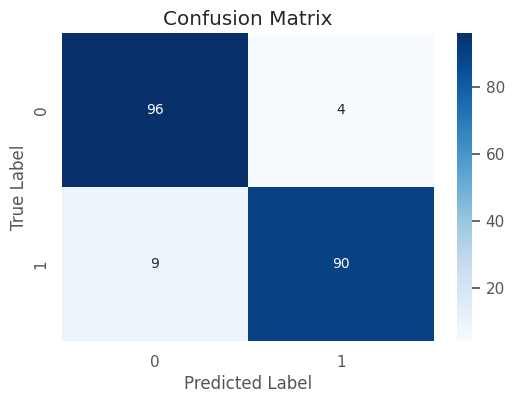

In [ ]:
# Visualize confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, cmap="Blues")
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
!pip install xgboost

In [ ]:
import xgboost as xgb

In [ ]:
xgb_classifier = xgb.XGBClassifier()

In [ ]:
xgb_classifier.fit(X_train, Y_train)


In [ ]:
xgb_classifier.fit(X_train, Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
predictions = xgb_classifier.predict(X_test)

In [ ]:
print(predictions)

[1 0 0 0 1 0 1 0 0 0 0 0 0 1 0 1 1 0 1 0 1 1 0 1 1 1 0 1 1 1 0 1 0 0 0 0 1
 1 1 0 0 1 0 1 0 0 1 0 0 0 0 1 0 1 0 1 1 1 0 1 0 0 0 0 1 1 1 1 0 0 0 1 1 0
 0 1 1 1 0 0 0 0 0 1 0 1 0 1 0 1 1 1 1 0 1 1 0 0 0 0 0 0 1 0 0 0 1 1 1 1 0
 1 1 0 0 1 1 1 0 1 0 1 0 0 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 1 0 0 1 0 1 0 1
 1 1 0 1 1 0 1 0 0 0 1 0 1 1 0 1 0 1 1 1 0 0 1 1 0 0 1 0 1 0 1 1 1 1 0 1 0
 1 1 0 1 1 0 1 1 0 1 0 0 1 1]


In [ ]:
train_accuracy = xgb_classifier.score(X_train, Y_train)
print("Training Accuracy:", train_accuracy)

Training Accuracy: 1.0


In [ ]:
print("Accuracy of model on testing data::",accuracy_score(Y_test,predictions))

Accuracy of model on testing data:: 0.9296482412060302


In [ ]:
input_data = (2,146,0,0,0,27.5,0.24,28)
input_data_as_numpy_array = np.asarray(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
std_data = scaler.transform(input_data_reshaped)
print(std_data)
prediction = xgb_classifier.predict(std_data)
print(prediction)
if prediction[0] == 0:
    print("The person is non-diabetic")
elif prediction[0] == 1:

    print("The Person is diabetic")

[[-0.64532063  0.64373435 -6.30590736 -3.60115567 -2.42372844 -0.82957711
  -0.76336768 -0.54572812]]
[0]
The person is non-diabetic


In [ ]:
import pickle

with open("diabetes_model.pkl", "wb") as f:
    pickle.dump(xgb_classifier, f)

In [ ]:
with open('diabetes_model.pkl', 'rb') as file:
    xgb_classifier_model = pickle.load(file)

In [ ]:
input_data = (1,81,72,18,40,26.6,0.283,24)
input_data_as_numpy_array = np.asarray(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
std_data = scaler.transform(input_data_reshaped)
print(std_data)
prediction = xgb_classifier.predict(std_data)
print(prediction)
if prediction[0] == 0:
    print("The person is non-diabetic")
else:

    print("The Person is diabetic")

[[-0.93381007 -1.44440283 -0.06881204 -1.40038095 -1.75991783 -0.96694755
  -0.63547211 -0.8888511 ]]
[0]
The person is non-diabetic
